## Amazon and Best Buy Electronics Reviews

## Objectives:
- 1. Visualize and explore interesting insights from the data.
- 2. What is the online reputation of diffetent brands.
- 3. What is the correlation between review ratings and the sentiment

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from textblob import TextBlob

%matplotlib inline
#graphs show automatically

pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn')
#sets style to seaborn

## Load Data

In [2]:
df = pd.read_csv("data\DatafinitiElectronicsProductData.csv", index_col=None, header=0)

In [3]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,reviews.date,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-01T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-11-28T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


In [4]:
df.tail()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,reviews.date,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
7294,AVpgfP3DilAPnD_xtG3M,B00IAKLM54,Logitech,"Electronics,Accessories & Supplies,Audio & Vid...",Black,2015-05-18T12:55:52Z,2018-03-23T17:22:18Z,2.2 x 1.2 x 7.3 inches,9.785510e+10,https://images-na.ssl-images-amazon.com/images...,"logitech/915000224,logitech915000224harmonyult...",Logitech,915-000224,Logitech 915-000224 Harmony Ultimate One 15-D...,Electronics,2017-03-10T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,4.0,http://www.ebay.com/itm/Logitech-Harmony-Ultim...,This remote was a decent replacement for my lo...,Great Remote,daddyluv01,https://www.amazon.com/Logitech-Ultimate-15-De...,9.785510e+10,1.7 pounds
7295,AVpe8ZRY1cnluZ0-aY4H,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Peerless-AV,"Office,Projectors & Presentation Equipment,Aud...",NaN,2015-07-13T16:17:19Z,2018-06-05T22:51:35Z,NaN,7.350000e+11,https://pisces.bbystatic.com/image2/BestBuy_US...,"peerlessav/acc570,roundlcdprojectorceilingplat...",Peerless,ACC570,Round LCD/Projector Ceiling Plate - Black,Electronics,2017-02-12T00:00:00.000Z,"2017-09-08T00:00:00Z,2018-05-25T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/8180158/review...,This looks good on my celling. Flushes very we...,Good product,Dash001,http://www.amazon.com/BEST-PEERLESS-AV-Ceiling...,7.350000e+11,1.2 lbs
7296,AVpe8ZRY1cnluZ0-aY4H,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Peerless-AV,"Office,Projectors & Presentation Equipment,Aud...",NaN,2015-07-13T16:17:19Z,2018-06-05T22:51:35Z,NaN,7.350000e+11,https://pisces.bbystatic.com/image2/BestBuy_US...,"peerlessav/acc570,roundlcdprojectorceilingplat...",Peerless,ACC570,Round LCD/Projector Ceiling Plate - Black,Electronics,2015-02-11T00:00:00.000Z,"2017-09-08T00:00:00Z,2018-05-25T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/8180158/review...,"Great Plate for projector mount, very easy to ...",Great Plate,Anirban,http://www.amazon.com/BEST-PEERLESS-AV-Ceiling...,7.350000e+11,1.2 lbs
7297,AVpe8ZRY1cnluZ0-aY4H,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Peerless-AV,"Office,Projectors & Presentation Equipment,Aud...",NaN,2015-07-13T16:17:19Z,2018-06-05T22:51:35Z,NaN,7.350000e+11,https://pisces.bbystatic.com/image2/BestBuy_US...,"peerlessav/acc570,roundlcdprojectorceilingplat...",Peerless,ACC570,Round LCD/Projector Ceiling Plate - Black,Electronics,2013-07-05T00:00:00.000Z,"2017-09-08T00:00:00Z,2016-01-31T00:00:00Z,2018...",True,0.0,5.0,http://reviews.bestbuy.com/3545/8180158/review...,This mount worked very well for me when I used...,great mount works well with adjustable column,jbce,http://www.amazon.com/BEST-PEERLESS-AV-Ceiling...,7.350000e+11,1.2 lbs
7298,AVpe8ZRY1cnluZ0-aY4H,"B005MJHFHK,B00VXW0J5A,B00OY50CZU",Peerless-AV,"Office,Projectors & Presentation Equipment,Aud...",NaN,2015-07-13T16:17:19Z,2018-06-05T22:51:35Z,NaN,7.350000e+11,https://pisces.bbystatic.com/image2/BestBuy_US...,"peerlessav/acc570,roundlcdprojectorceilingplat...",Peerless,ACC570,Round LCD/Projector Ceiling Plate - Black,Electronics,2015-03-13T00:00:00.000Z,"2017-09-08T00:00:00Z,2016-01-31T00:00:00Z,2018...",True,0.0,4.0,http://reviews.bestbuy.com/3545/8180158/review...,It's a nice solid mounting plate check and mak...,Mount plate,Scott1226,http://www.amazon.com/BEST-PEERLESS-AV-Ceiling...,7.350000e+11,1.2 lbs


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7299 non-null   object 
 1   asins                7299 non-null   object 
 2   brand                7299 non-null   object 
 3   categories           7299 non-null   object 
 4   colors               5280 non-null   object 
 5   dateAdded            7299 non-null   object 
 6   dateUpdated          7299 non-null   object 
 7   dimension            6090 non-null   object 
 8   ean                  2951 non-null   float64
 9   imageURLs            7299 non-null   object 
 10  keys                 7299 non-null   object 
 11  manufacturer         4632 non-null   object 
 12  manufacturerNumber   7299 non-null   object 
 13  name                 7299 non-null   object 
 14  primaryCategories    7299 non-null   object 
 15  reviews.date         7238 non-null   o

In [6]:
df['brand'].value_counts()

Logitech                  1692
Sony                      1047
Microsoft                  507
JBL                        454
Samsung                    426
Sling Media                342
Alpine                     270
Pny                        191
Sanus                      162
MEE audio                  160
Sdi Technologies, Inc.     154
Yamaha                     150
Netgear                    149
Verizon Wireless           148
Lowepro                    143
JVC                        142
Glengery                   127
Definitive Technology      123
Dell                       116
Corsair                    114
Bowers & Wilkins           107
Ultimate Ears              100
Siriusxm                    90
Boytone                     83
WD                          54
Motorola                    48
Midland                     44
Belkin                      40
Lenovo                      39
Bose                        25
Toshiba                     23
CLARITY-TELECOM             11
House of

In [7]:
df['reviews.doRecommend'].value_counts()

True     5401
False     507
Name: reviews.doRecommend, dtype: int64

In [8]:
#drop irrelevant columns

df = df.drop(['id', 'asins','ean', 'imageURLs', 'colors', 'keys', 'manufacturer','dimension', 'manufacturerNumber',\
              'reviews.numHelpful', 'reviews.sourceURLs', 'sourceURLs', 'upc', 'weight'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                7299 non-null   object 
 1   categories           7299 non-null   object 
 2   dateAdded            7299 non-null   object 
 3   dateUpdated          7299 non-null   object 
 4   name                 7299 non-null   object 
 5   primaryCategories    7299 non-null   object 
 6   reviews.date         7238 non-null   object 
 7   reviews.dateSeen     7299 non-null   object 
 8   reviews.doRecommend  5908 non-null   object 
 9   reviews.rating       7135 non-null   float64
 10  reviews.text         7294 non-null   object 
 11  reviews.title        7295 non-null   object 
 12  reviews.username     7299 non-null   object 
dtypes: float64(1), object(12)
memory usage: 741.4+ KB


In [10]:
#drop observations using reviews text and reviews rating as a subset

df.dropna(subset=['reviews.text', 'reviews.rating'], inplace=True)

In [11]:
#rename columns
df = df.rename(columns={'dateAdded':'date Added', 'dateUpdated':'date Updated', 'primaryCategories':'primary Categories'})

#columns written appropriately
df = df.rename(columns=lambda x: x.title())
df = df.rename(columns=lambda x: x.replace('.',' '))

df.head()

,Brand,Categories,Date Added,Date Updated,Name,Primary Categories,Reviews Date,Reviews Dateseen,Reviews Dorecommend,Reviews Rating,Reviews Text,Reviews Title,Reviews Username
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,5.0,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,4.0,It's thin and light. I can type pretty easily ...,Nice,Appa
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,4.0,I love the new design the keys are spaced well...,New,Kman
3,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-01T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,5.0,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY
4,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-11-28T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,5.0,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster


In [12]:
#remove the trailing whitespace characters from the dates

df['Date Added'] = df['Date Added'].str.strip()
df['Date Updated'] = df['Date Updated'].str.strip()
df['Reviews Date'] = df['Reviews Date'].str.strip()
df['Reviews Dateseen'] = df['Reviews Dateseen'].str.strip()

In [13]:
#convert string columns to datetime format
df['Date Added'] = pd.to_datetime(df['Date Added'])
df['Date Updated'] = pd.to_datetime(df['Date Updated'])
df['Reviews Date'] = pd.to_datetime(df['Reviews Date'])

#convert 'Reviews Dateseen' column to datetime format
df['Reviews Dateseen'] = df['Reviews Dateseen'].apply(lambda x: min(pd.to_datetime(x.split(','))))

# Display the DataFrame with converted date columns
df.head()

,Brand,Categories,Date Added,Date Updated,Name,Primary Categories,Reviews Date,Reviews Dateseen,Reviews Dorecommend,Reviews Rating,Reviews Text,Reviews Title,Reviews Username
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13 12:28:09+00:00,2018-01-29 02:15:13+00:00,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04 00:00:00+00:00,2016-02-25 00:00:00+00:00,True,5.0,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13 12:28:09+00:00,2018-01-29 02:15:13+00:00,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04 00:00:00+00:00,2016-02-25 00:00:00+00:00,True,4.0,It's thin and light. I can type pretty easily ...,Nice,Appa
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13 12:28:09+00:00,2018-01-29 02:15:13+00:00,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04 00:00:00+00:00,2016-02-06 00:00:00+00:00,True,4.0,I love the new design the keys are spaced well...,New,Kman
3,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13 12:28:09+00:00,2018-01-29 02:15:13+00:00,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-01 00:00:00+00:00,2016-02-25 00:00:00+00:00,True,5.0,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY
4,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13 12:28:09+00:00,2018-01-29 02:15:13+00:00,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-11-28 00:00:00+00:00,2016-02-06 00:00:00+00:00,True,5.0,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster


In [14]:
#convert 'Date Added' column to datetime format
df['Date Added'] = pd.to_datetime(df['Date Added'], format='%Y-%m-%d')

#convert 'Date Updated' column to datetime format
df['Date Updated'] = pd.to_datetime(df['Date Updated'], format='%Y-%m-%d')

#convert 'Reviews Date' column to datetime format
df['Reviews Date'] = pd.to_datetime(df['Reviews Date'], format='%Y-%m-%d')

# Convert 'Reviews Dateseen' column to datetime format
df['Reviews Dateseen'] = pd.to_datetime(df['Reviews Dateseen'], format='%Y-%m-%d')

In [15]:
df['Date Added'] = pd.to_datetime(df['Date Added']).dt.strftime('%Y-%m-%d')
df['Date Updated'] = pd.to_datetime(df['Date Updated']).dt.strftime('%Y-%m-%d')
df['Reviews Date'] = pd.to_datetime(df['Reviews Date']).dt.strftime('%Y-%m-%d')
df['Reviews Dateseen'] = pd.to_datetime(df['Reviews Dateseen']).dt.strftime('%Y-%m-%d')

In [16]:
df.head()

,Brand,Categories,Date Added,Date Updated,Name,Primary Categories,Reviews Date,Reviews Dateseen,Reviews Dorecommend,Reviews Rating,Reviews Text,Reviews Title,Reviews Username
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13,2018-01-29,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04,2016-02-25,True,5.0,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13,2018-01-29,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04,2016-02-25,True,4.0,It's thin and light. I can type pretty easily ...,Nice,Appa
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13,2018-01-29,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04,2016-02-06,True,4.0,I love the new design the keys are spaced well...,New,Kman
3,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13,2018-01-29,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-01,2016-02-25,True,5.0,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY
4,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13,2018-01-29,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-11-28,2016-02-06,True,5.0,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster


## Exploring the data

In [17]:
#format the date column to appropriate data type 

df['Reviews Date'] = pd.to_datetime(df['Reviews Date'])
df['Reviews Date Day Name'] = df['Reviews Date'].dt.day_name()
df['Reviews Date Week'] = df['Reviews Date'].dt.week
df['Reviews Date Month'] = df['Reviews Date'].dt.month
df['Reviews Date Year'] = df['Reviews Date'].dt.year

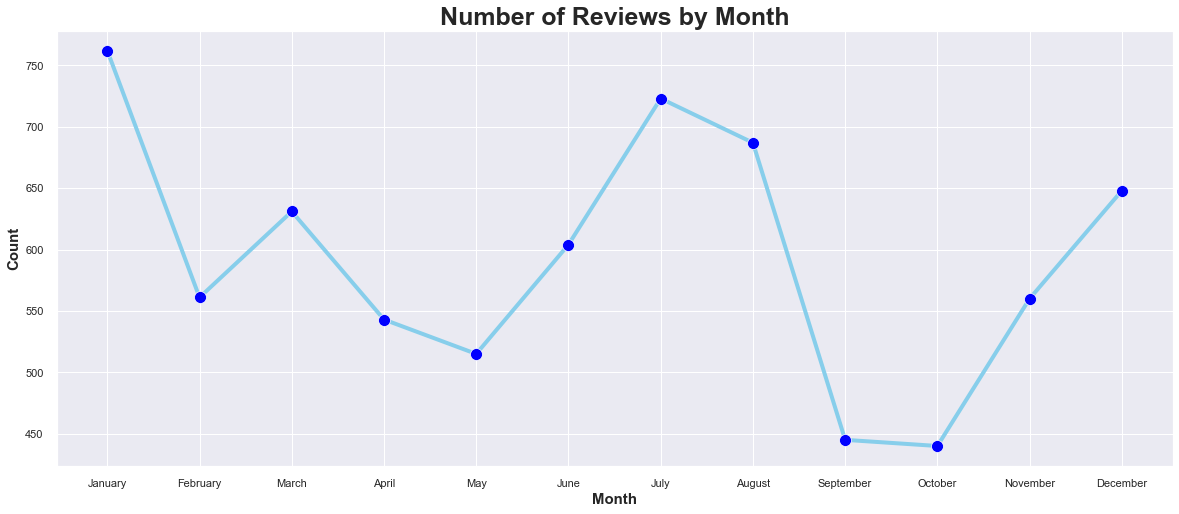

In [18]:
#group by "Month" and count the number of comments
count_by_month = df.groupby("Reviews Date Month")["Reviews Text"].count().reset_index(name="Count")

count_by_month["Reviews Date Month"] = count_by_month["Reviews Date Month"].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April',\
                                                           5: 'May', 6: 'June', 7: 'July', 8: 'August',\
                                                           9: 'September', 10: 'October', 11: 'November', 12: 'December'})


#Set Seaborn style
sns.set(style="darkgrid")

#Create the line plot
plt.figure(figsize=(20, 8))
sns.lineplot(x="Reviews Date Month", y="Count", data=count_by_month, marker='o', markersize=12, color='skyblue', linewidth=4,markerfacecolor='blue')

#Customize the plot
plt.title('Number of Reviews by Month', fontsize=25, fontweight='bold')
plt.xlabel("Month", fontsize=15, fontweight='bold')
plt.ylabel("Count", fontsize=15, fontweight='bold')
plt.show()

This graph provides insights into the distribution of reviews across different months, allowing stakeholders to understand monthly review trends and potentially make informed decisions based on these patterns. **January**, which has the highest review counts, could reflect a surge in reviews due to the holiday shopping season in December. Many consumers may purchase products in December, experience them in the following month, and then leave reviews in January.

**October**, being the month with the lowest review count can be attributed to the fact that after the peak summer months and before the holiday season starts in November, there might be a lull in consumer activity. People might be settling back into routines after vacations, preparing for the end-of-year festivities, or focusing on other activities rather than purchasing and reviewing products.

**July** and **August** also have high counts. These months are typically associated with summer vacations, travels, and leisure activities. Products related to travel, outdoor activities, or summer-specific items might see increased usage and subsequent reviews during this time.

Recognizing these seasonal patterns can help businesses plan their inventory better. For instance, if a product category sees a surge in reviews in July and August, it might indicate increased sales potential during these months in subsequent years.

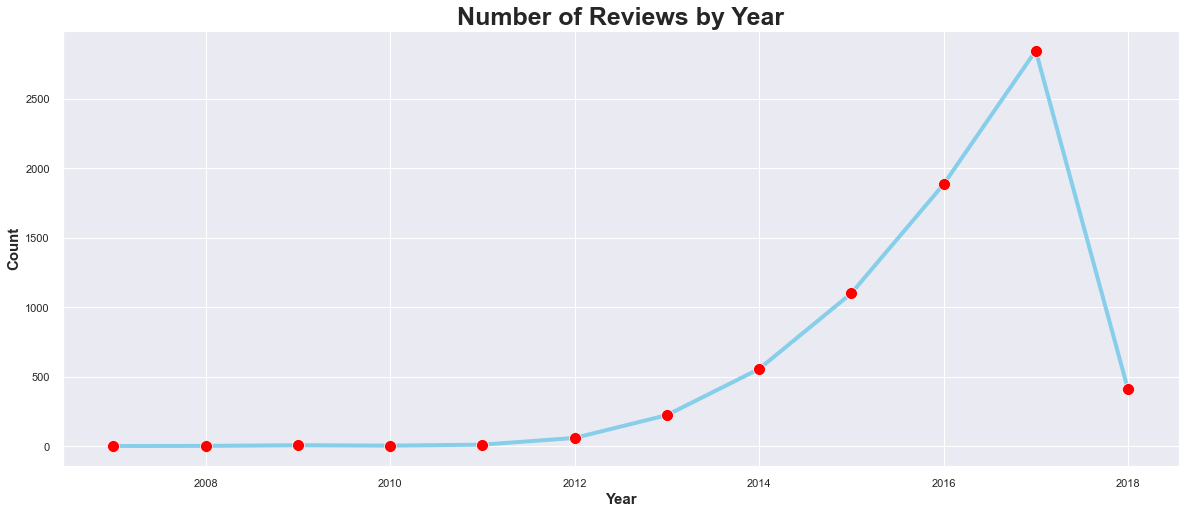

In [19]:
# Group by "YEAR" and count the number of comments
count_by_year = df.groupby("Reviews Date Year")["Reviews Text"].count().reset_index(name="Count")

# Set Seaborn style
sns.set(style="darkgrid")

# Create the line plot
plt.figure(figsize=(20, 8))
sns.lineplot(x="Reviews Date Year", y="Count", data=count_by_year, marker='o', markersize=12, color='skyblue', linewidth=4, markerfacecolor='red')

# Customize the plot
plt.title('Number of Reviews by Year', fontsize=25, fontweight='bold')
plt.xlabel("Year", fontsize=15, fontweight='bold')
plt.ylabel("Count", fontsize=15, fontweight='bold')

plt.show()

This lineplot visualizes the trend of review counts across different years. Each point on the line represents the count of reviews for a specific year, and the connected line provides a visual representation of the trend over time. By examining this plot, one can identify patterns such as increasing or decreasing review counts over the years or any anomalies in specific years

In [20]:
df_reviews_dist = df.dropna(subset=['Reviews Rating'])
df_reviews_dist = df_reviews_dist[['Brand', 'Reviews Rating']]

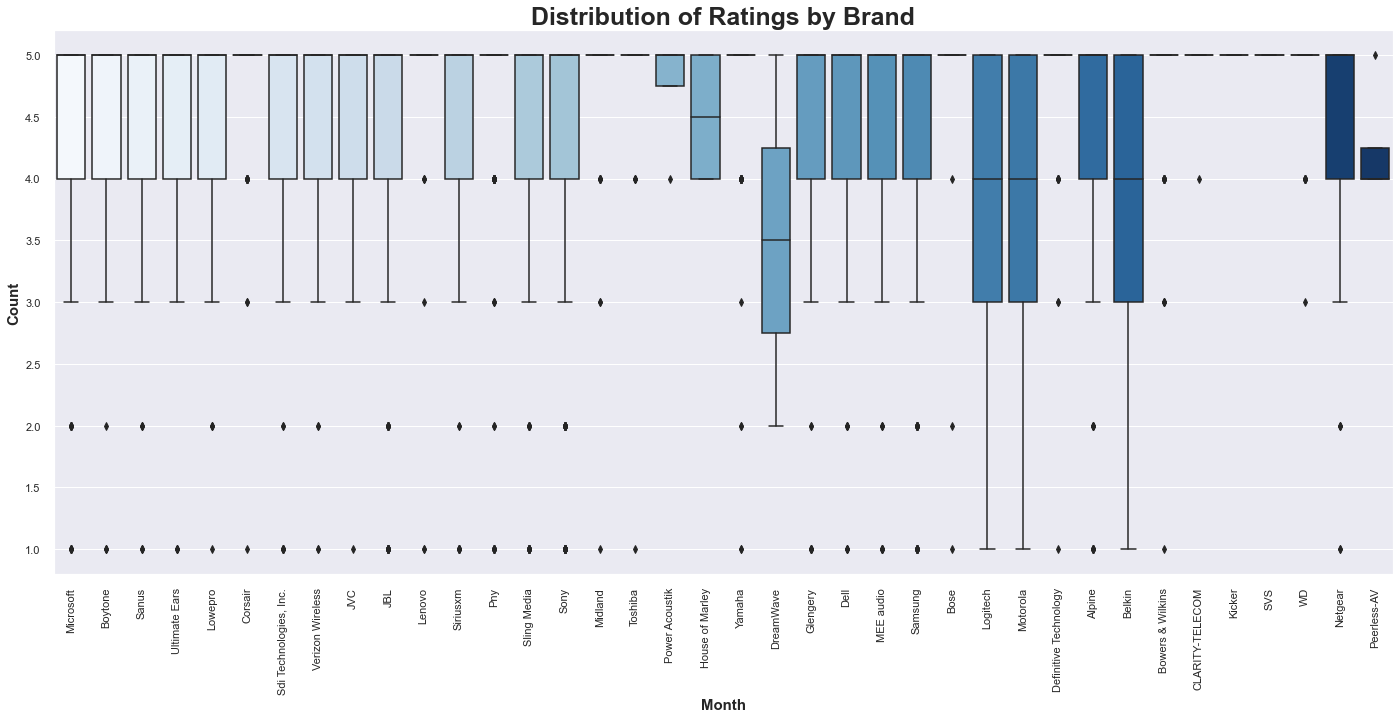

In [21]:
plt.figure(figsize=(24, 10))
sns.boxplot(data=df_reviews_dist, x='Brand', y='Reviews Rating', palette='Blues')
plt.xticks(rotation=90)
plt.title('Distribution of Ratings by Brand', fontsize=25, fontweight='bold')
plt.xlabel("Month", fontsize=15, fontweight='bold')
plt.ylabel("Count", fontsize=15, fontweight='bold')
plt.show()

This visualization provides a comprehensive view of how ratings are distributed among various brands, enabling stakeholders to gauge brand performance and customer satisfaction levels effectively.

In [22]:
# Average rating by brand
avg_rating = df.groupby('Brand')['Reviews Rating'].mean()
avg_rating = pd.DataFrame(avg_rating).reset_index()
avg_rating = avg_rating.sort_values('Reviews Rating', ascending=False)
avg_rating

,Brand,Reviews Rating
14,Kicker,5.000000
26,SVS,5.000000
5,CLARITY-TELECOM,4.909091
7,Definitive Technology,4.851852
6,Corsair,4.798246
36,WD,4.796296
3,Bowers & Wilkins,4.766355
25,Power Acoustik,4.750000
37,Yamaha,4.669565
20,Midland,4.659091


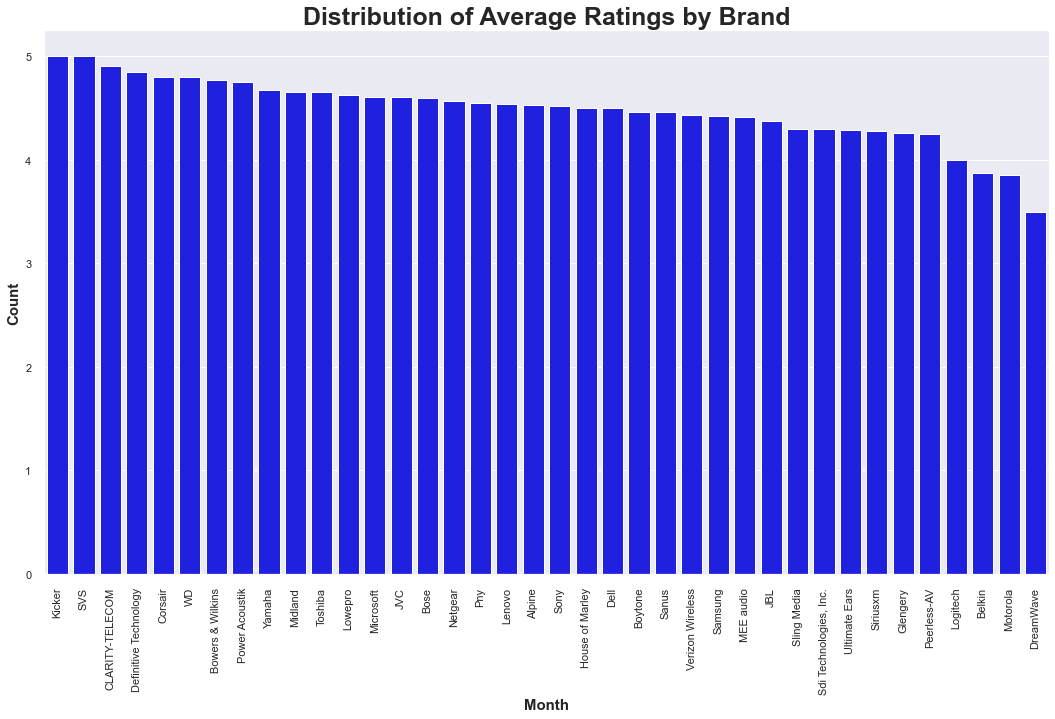

In [23]:
plt.figure(figsize=(18, 10))
sns.barplot(data=avg_rating, x='Brand', y='Reviews Rating', color='blue')
plt.xticks(rotation=90)
plt.title('Distribution of Average Ratings by Brand', fontsize=25, fontweight='bold')
plt.xlabel("Month", fontsize=15, fontweight='bold')
plt.ylabel("Count", fontsize=15, fontweight='bold')
plt.show()

The visualization will provide insights into the average ratings for each brand, sorted from highest to lowest. By examining this graph, you can quickly identify which brands have the highest average customer ratings, enabling stakeholders to understand brand performance in terms of customer satisfaction.

This visualization is valuable for various purposes, such as:
- Identifying top-performing brands based on customer feedback.
- Making informed decisions regarding marketing strategies, product enhancements, or brand positioning.
- Conducting further analysis or investigations into factors contributing to high or low average ratings across brands.

In [24]:
def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

#apply sentiment analysis
df['Sentiment'] = df['Reviews Text'].apply(get_sentiment)

#count of sentiment by brand
sentiment_count = df.groupby(['Brand', 'Sentiment']).size().unstack(fill_value=0)
sentiment_count

Sentiment,Negative,Neutral,Positive
Brand,,,
Alpine,6,8,246
Belkin,3,5,32
Bose,1,0,19
Bowers & Wilkins,2,0,105
Boytone,2,0,72
CLARITY-TELECOM,0,2,9
Corsair,10,12,92
Definitive Technology,0,4,104
Dell,2,3,111


This function takes a text as input and returns its sentiment as either 'Positive', 'Neutral', or 'Negative' based on the polarity score calculated by TextBlob. TextBlob(str(text)): Converts the input text to a TextBlob object, which is part of the TextBlob library used for processing textual data.

analysis.sentiment.polarity: Calculates the polarity score of the text. The polarity lies in the range of [-1, 1], where 1 means positive sentiment, -1 means negative sentiment, and 0 means neutral sentiment.

Based on the polarity score, the function returns the corresponding sentiment label ('Positive', 'Neutral', or 'Negative').

In essence, this sentiment analysis function serves as a valuable tool for brands aiming to assess their online reputation. By quantifying textual feedback into distinct sentiment categories ('Positive', 'Neutral', 'Negative'), businesses can proactively manage their brand image, address customer concerns, and foster positive relationships with their target audience.

In [25]:
sentiment_percentage = sentiment_count.apply(lambda x: x / x.sum() * 100, axis=1)

round(sentiment_percentage, 2)

Sentiment,Negative,Neutral,Positive
Brand,,,
Alpine,2.31,3.08,94.62
Belkin,7.50,12.50,80.00
Bose,5.00,0.00,95.00
Bowers & Wilkins,1.87,0.00,98.13
Boytone,2.70,0.00,97.30
CLARITY-TELECOM,0.00,18.18,81.82
Corsair,8.77,10.53,80.70
Definitive Technology,0.00,3.70,96.30
Dell,1.72,2.59,95.69


In [26]:
df.head()

,Brand,Categories,Date Added,Date Updated,Name,Primary Categories,Reviews Date,Reviews Dateseen,Reviews Dorecommend,Reviews Rating,Reviews Text,Reviews Title,Reviews Username,Reviews Date Day Name,Reviews Date Week,Reviews Date Month,Reviews Date Year,Sentiment
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13,2018-01-29,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04,2016-02-25,True,5.0,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,Friday,49.0,12.0,2015.0,Positive
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13,2018-01-29,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04,2016-02-25,True,4.0,It's thin and light. I can type pretty easily ...,Nice,Appa,Friday,49.0,12.0,2015.0,Positive
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13,2018-01-29,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04,2016-02-06,True,4.0,I love the new design the keys are spaced well...,New,Kman,Friday,49.0,12.0,2015.0,Positive
3,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13,2018-01-29,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-01,2016-02-25,True,5.0,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,Tuesday,49.0,12.0,2015.0,Positive
4,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13,2018-01-29,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-11-28,2016-02-06,True,5.0,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,Saturday,48.0,11.0,2015.0,Positive


In [27]:
df['Sentiment'] = df['Sentiment'].map({'Positive':1, 'Negative':0})

In [28]:
correlation = df['Reviews Rating'].corr(df['Sentiment'])
print(f"The correlation between Reviews Rating and Sentiment is: {correlation}")

The correlation between Reviews Rating and Sentiment is: 0.37186322725900417


A positive correlation value 0f 0.37 indicates that as review ratings increase, the likelihood of a positive review also increases.

#### Conclusions

- By applying this sentiment analysis function, businesses can gauge the general sentiment surrounding their brand.
- Monitoring online sentiment helps brands understand public perception. Positive sentiments can reinforce brand loyalty and trust, while negative sentiments may highlight areas of improvement or concern.
- Based on the sentiment analysis results, brands can make informed decisions. For instance, consistently negative feedback may necessitate product improvements or customer service enhancements